# Calculating Offshore Wind Learning Curves Using the FORCE Model <br />
### Background <br />
Learning curves describe cost reductions associated with producing more of a <br />
particular good or service. They are observed empirically for any form of <br />
industrial production. We can derive a fixed-bottom offshore learning curve <br />
from historical project CapEx data and use it to forecast future costs by <br />
making several assumptions including: <br />
- Industrial learning will continue at the same rate as observed in historical <br />
data. Learning rates describe the percentage cost reduction for every doubling <br />
of production (in this case global installed fixed-bottom offshore wind <br />
capacity) <br />
- To calculate cost reductions over time, we need estimates of global offshore <br />
wind deployment (specified in MW) for both current and future years. <br />
- Finally we also need an estimate of current offshore wind CapEx costs. <br />
<br />
For additional information, see Shields et al. (2021) at: <br />
https://www.nrel.gov/docs/fy23osti/81819.pdf <br />
<br /> 
The FORCE model is available on GitHub: <br /> 
https://github.com/NREL/FORCE <br />

In [ ]:
# Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from FORCE.learning import Regression
from FORCE.utils import plot_learning_forecast, calc_curve

### Simplest Example <br/>
Taking data from the Offshore Wind Market Report - 2022 Edition: <br/>
https://www.energy.gov/sites/default/files/2022-09/offshore-wind-market-report-2022-v2.pdf <br/>
<br/>
Cumulative global installed OSW capacity through 2021: 50623 MW <br/>
BNEF forecast for 2031: 261,000 MW <br/>
4C forecast for 2031: 286,000 MW <br/>
2021 mean CapEx: $3400/MWh <br/>
Example experience factor: -0.10

In [34]:
installed = 50623 # Cumulative global installed OSW capacity through 2021
bnef_2031 = 261000 # BNEF projection for 2031
current_capex = 3400 # Global average in 2021 in $/kW
b = -0.1 # Example experience factor

LR = 1-2**b
print("Learning Rate: ", LR*100)

Learning Rate:  6.696700846319259


The experience factor of -0.1 corresponds to a learning rate of 6.7%:<br/>
Learning Rate = 1-2^(experience factor)

In [42]:
upcoming = bnef_2031 - installed
C_2031 = current_capex*upcoming**b
print("2031 CapEx: ", C_2031, " $/kW")
print("% change: ", (current_capex-C_2031)/current_capex*100)
print(1-((upcoming)/installed)**b)
print(1-((upcoming)**b / installed**b))

2031 CapEx:  998.1115731200532  $/kW
% change:  70.6437772611749
0.13276866384327723
0.13276866384327735


In [46]:
test = current_capex * (bnef_2031/installed)**b
print(test)
print((current_capex-test)/current_capex)

2885.6898651296215
0.15126768672658192


In [44]:
test1 = current_capex * (upcoming)**b
print(test1)

998.1115731200532


To calculate CapEx in 2031, we use the equation: <br/>
C_Q = C_1 * Q^b <br/>
where Q is the global cumulative production of the item, <br/>
C_1 is the cost of the first unit, <br/>
C_Q is the cost of the Qth item, <br/>
and b is the experience parameter.

[1.11022302e-16 6.22199406e-03 1.20429837e-02 1.75095884e-02
 2.26608449e-02 2.75297578e-02 3.21444735e-02 3.65291837e-02
 4.07048282e-02 4.46896492e-02 4.84996329e-02 5.21488639e-02
 5.56498136e-02 5.90135762e-02 6.22500621e-02 6.53681604e-02
 6.83758728e-02 7.12804278e-02 7.40883761e-02 7.68056721e-02
 7.94377442e-02 8.19895541e-02 8.44656484e-02 8.68702037e-02
 8.92070650e-02 9.14797800e-02 9.36916285e-02 9.58456487e-02
 9.79446600e-02 9.99912835e-02 1.01987960e-01 1.03936967e-01
 1.05840430e-01 1.07700339e-01 1.09518557e-01 1.11296834e-01
 1.13036812e-01 1.14740035e-01 1.16407957e-01 1.18041950e-01
 1.19643307e-01 1.21213251e-01 1.22752936e-01 1.24263459e-01
 1.25745854e-01 1.27201106e-01 1.28630148e-01 1.30033866e-01
 1.31413104e-01 1.32768664e-01]


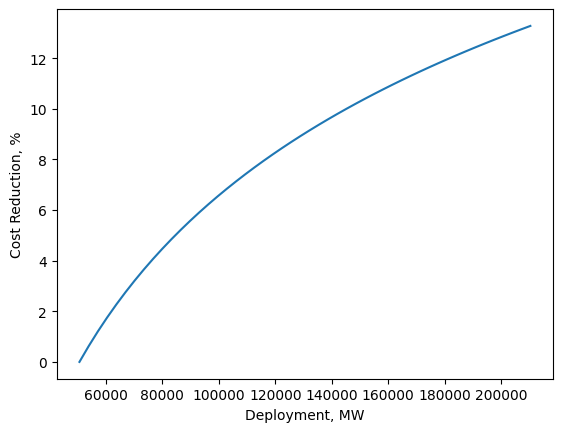

In [38]:
upcoming = bnef_2031 - installed
x = np.linspace(installed, upcoming) # Assumes linear deployment trajectory
b = -0.10 # "cumulative capacity fit" or "experience factor b"
C0 = 3400 / (installed ** b)
y = calc_curve(x, C0, b, capex_0=3400)
print(y)
plt.plot(x,y*100)
plt.xlabel('Deployment, MW')
plt.ylabel('Cost Reduction, %')
plt.show()

### Obtain a Learning Rate for Fixed-Bottom OSW <br />

In [19]:
# 4C Project Database (Paid subscription - Please don't commit data to repository)
fp = os.path.join(os.getcwd(), "data", "4Cdb_jan2023_OWMR.csv") # 2021_OWMR
# fp = os.path.join(os.getcwd(), "data", "2021_OWMR.csv")
projects = pd.read_csv(fp, header=2) #, encoding="ISO-8859-1") # encoding may be required for databases that have project names with special characters
DIR = "C:/Users/pduffy/Documents/repos/FORCE/examples/"
FORECAST_FP_FIXED = os.path.join(DIR, "data", "2023_fixed_forecast.csv")
FORECAST_FIXED = pd.read_csv(FORECAST_FP_FIXED).set_index("year").to_dict()["simple_avg"] # mannually re run with different deployments
FORECAST_FP_FLOATING = os.path.join(DIR, "data", "2023_floating_forecast.csv")
FORECAST_FLOATING = pd.read_csv(FORECAST_FP_FLOATING).set_index("year").to_dict()["simple_avg"]

In [20]:
filters = {
   'Capacity MW (Max)': (149, ),
   'Full Commissioning': (2014, 2020),
#    'CAPEX_per_kw': (800, 8000.0) # confirm with Matt we should remove
}

to_aggregate = {
    'United Kingdom': 'United Kingdom',
    'Germany': 'Germany',
    'Netherlands': 'Netherlands',
    'Belgium' : 'Belgium',
    'China': 'China',
    'Denmark': 'Denmark',
}

fixed_predictors = [
            'Country Name',
            'Water Depth Max (m)',
            # 'Turbine MW (Max)',
            'Capacity MW (Max)', # fixed is already commercial so we include this in the list to exclude effects from LR
            'Distance From Shore Auto (km)',
            ]
float_predictors = [
            'Country Name',
            'Water Depth Max (m)',
            # 'Turbine MW (Max)',
            'Capacity MW (Max)', # uncomment for ATB: same learning rate, but starting points are different: comment if going from demo to commercial scale
            'Distance From Shore Auto (km)',
            ]



In [21]:
# Def run regression
def run_regression(projects, filters, to_aggregate, to_drop, predictors):
    """
    Run FORCE Regression with given settings.

    Parameters
    ----------
    projects : DataFrame
    filters : dict
    to_aggregate : dict
    to_drop : list
        List of countries to drop.
    """

    regression = Regression(
        projects,
        y_var="log CAPEX_per_kw",
        filters=filters,
        regression_variables=predictors,
        aggregate_countries=to_aggregate,
        drop_categorical=["United Kingdom"],
        drop_country=to_drop,
        log_vars=['Cumulative Capacity', 'CAPEX_per_kw'],
    )
    print(regression.summary)
    return regression

In [22]:
regression = Regression(
    projects,
    y_var="log CAPEX_per_kw",
    filters=filters,
    regression_variables=['Country Name', 'Water Depth Max (m)', 'Turbine MW (Max)',  'Capacity MW (Max)', 'Distance From Shore Auto (km)'],
    aggregate_countries=to_aggregate,
    drop_categorical=["United Kingdom"],
#     drop_country=["China"],
    log_vars=['Cumulative Capacity', 'CAPEX_per_kw']
)

C:\Users\pduffy\Documents\repos\FORCE\FORCE\learning.py:187: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly = ret.groupby(["Full Commissioning"]).sum()["Capacity MW (Max)"]
C:\Users\pduffy\Documents\repos\FORCE\FORCE\learning.py:307: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, data in df.iteritems():


In [23]:
# Display learning rate
lr = np.round(regression.learning_rate, 3) * 100
print('Learning rate (%):', lr)
print(regression.cumulative_capacity_fit)
print(regression.summary, regression.vif)

Learning rate (%): 5.6000000000000005
-0.08242216288714699
                            OLS Regression Results                            
Dep. Variable:       log CAPEX_per_kw   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     25.12
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           1.54e-13
Time:                        10:27:08   Log-Likelihood:                 34.170
No. Observations:                  48   AIC:                            -46.34
Df Residuals:                      37   BIC:                            -25.76
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [ ]:
# Global announced cumulative capacity (per OWMR: 2021 edition)
forecast = {
#     2013: 6757,
#     2014: 7856,
#     2015: 11813,
#     2016: 13119,
#     2017: 16567,
#     2018: 21078,
#     2019: 27387,
#     2020: 32906,
#    2021: 51364,
    2022: 67032,
    2023: 77298,
    2024: 92674,
    2025: 115594,
    2026: 145460,
    2027: 167387,
    2028: 190860,
    2029: 201420,
    2030: 228978,
    2031: 240348,
    2032: 252645,
    2033: 260575,
    2034: 269220,
    2035: 276972
}

In [ ]:
axes = plot_learning_forecast(
    installed=regression.installed_capacity,
    capex=regression.current_capex,
    fit=regression.cumulative_capacity_fit,
    forecast=forecast,
    bse=regression.cumulative_capacity_bse,
    data_file="projected_capex.csv",
    figsize=(6, 4),
    dpi=150
)